<a href="https://colab.research.google.com/github/wiramonwrm/data-analytics/blob/main/healthy_factor_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysing Health factors from the dataset

Steps

1.  Import necessary libraries and tools
2.  See the overview of the data
3.  Clean the data
    - Fill the null value
    - Remove duplicates
4.  Basic analysis
    - Correlation Matrix
    - Scatter Plot
    - Data Distribution
5. Advance analysis

In [1]:
# import libraries and tools

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read the dataset

df = pd.read_csv('ss.csv')

In [3]:
# check data overview

df.head()

Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8        Obese   
4                 4                       30             8        Obese   

  Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  
0         126/83          77         4200            NaN  
1         125/80          75        10000            NaN  
2         125/80          75        10000            NaN  
3         140/90          85         3000    Sleep Apnea  
4         140/90          85         3000    Sleep Apnea

In [4]:
df.shape

(373, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                373 non-null    int64  
 1   Gender                   373 non-null    object 
 2   Age                      373 non-null    int64  
 3   Occupation               373 non-null    object 
 4   Sleep Duration           373 non-null    float64
 5   Quality of Sleep         373 non-null    int64  
 6   Physical Activity Level  373 non-null    int64  
 7   Stress Level             373 non-null    int64  
 8   BMI Category             373 non-null    object 
 9   Blood Pressure           373 non-null    object 
 10  Heart Rate               373 non-null    int64  
 11  Daily Steps              373 non-null    int64  
 12  Sleep Disorder           154 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.0+ KB


In [6]:
df.describe().T

count         mean          std     min     25%  \
Person ID                373.0   187.000000   107.820066     1.0    94.0   
Age                      373.0    42.139410     8.640793    27.0    35.0   
Sleep Duration           373.0     7.129491     0.795139     5.8     6.4   
Quality of Sleep         373.0     7.308311     1.195359     4.0     6.0   
Physical Activity Level  373.0    59.128686    20.842589    30.0    45.0   
Stress Level             373.0     5.391421     1.772590     3.0     4.0   
Heart Rate               373.0    70.171582     4.139704    65.0    68.0   
Daily Steps              373.0  6816.353887  1620.060932  3000.0  5600.0   

                            50%     75%      max  
Person ID                 187.0   280.0    373.0  
Age                        43.0    50.0     59.0  
Sleep Duration              7.2     7.8      8.5  
Quality of Sleep            7.0     8.0      9.0  
Physical Activity Level    60.0    75.0     90.0  
Stress Level                5.0     7.0      8.0  
Heart Rate                 70.0    72.0     86.0  
Daily Steps              7000.0  8000.0  10000.0

In [7]:
# check null value

df.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [8]:
#only the 'Sleep Disorder' has null value
#fill the null value with 'zero' to indicate no sleep disorder

df = df.fillna(0)

In [9]:
df.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [10]:
# check duplicates

df.duplicated().sum()

0

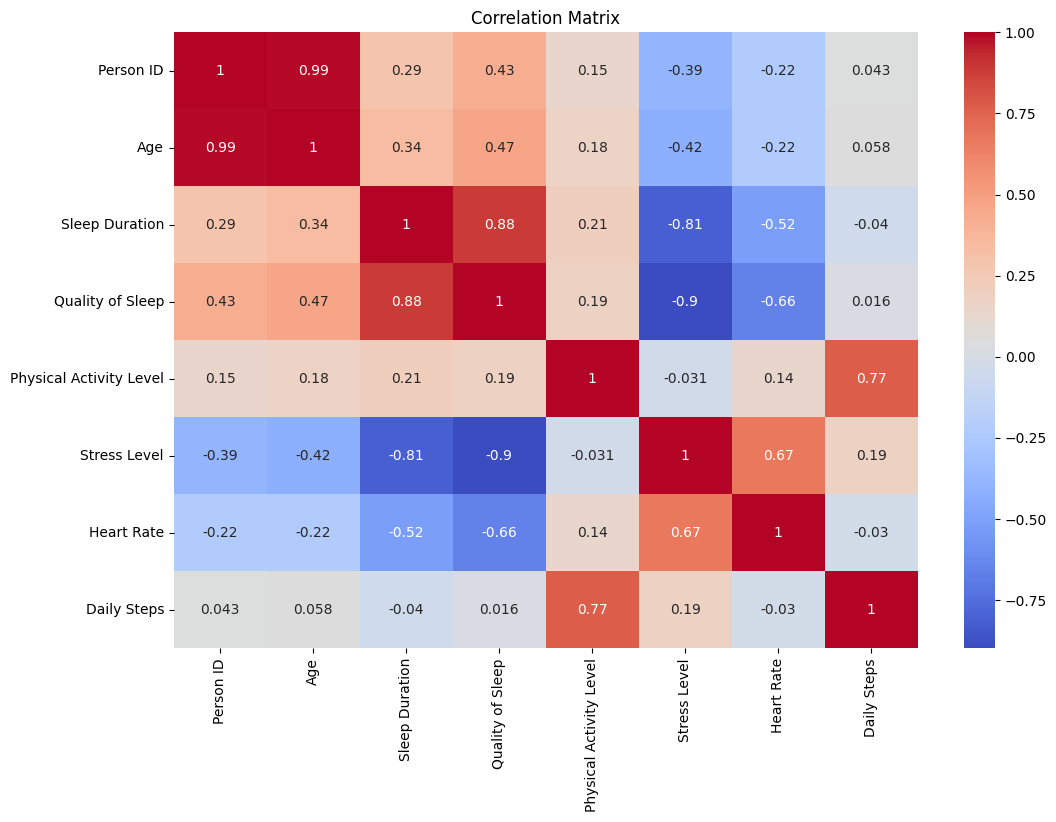

In [11]:
#create correlation matrix to see the relationship of data

numeric_cols = df.select_dtypes(include=np.number).columns  # اختيار الأعمدة الرقمية فقط
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Related featues discovered from the Correlation Matrix


*   **Sleep Duration**, **Quality of Sleep** and **Stress Level**
*   **Physical Activity Level** and **Daily Steps**
*   **Heart Rate**, **Quality of Sleep** and **Stress Level**


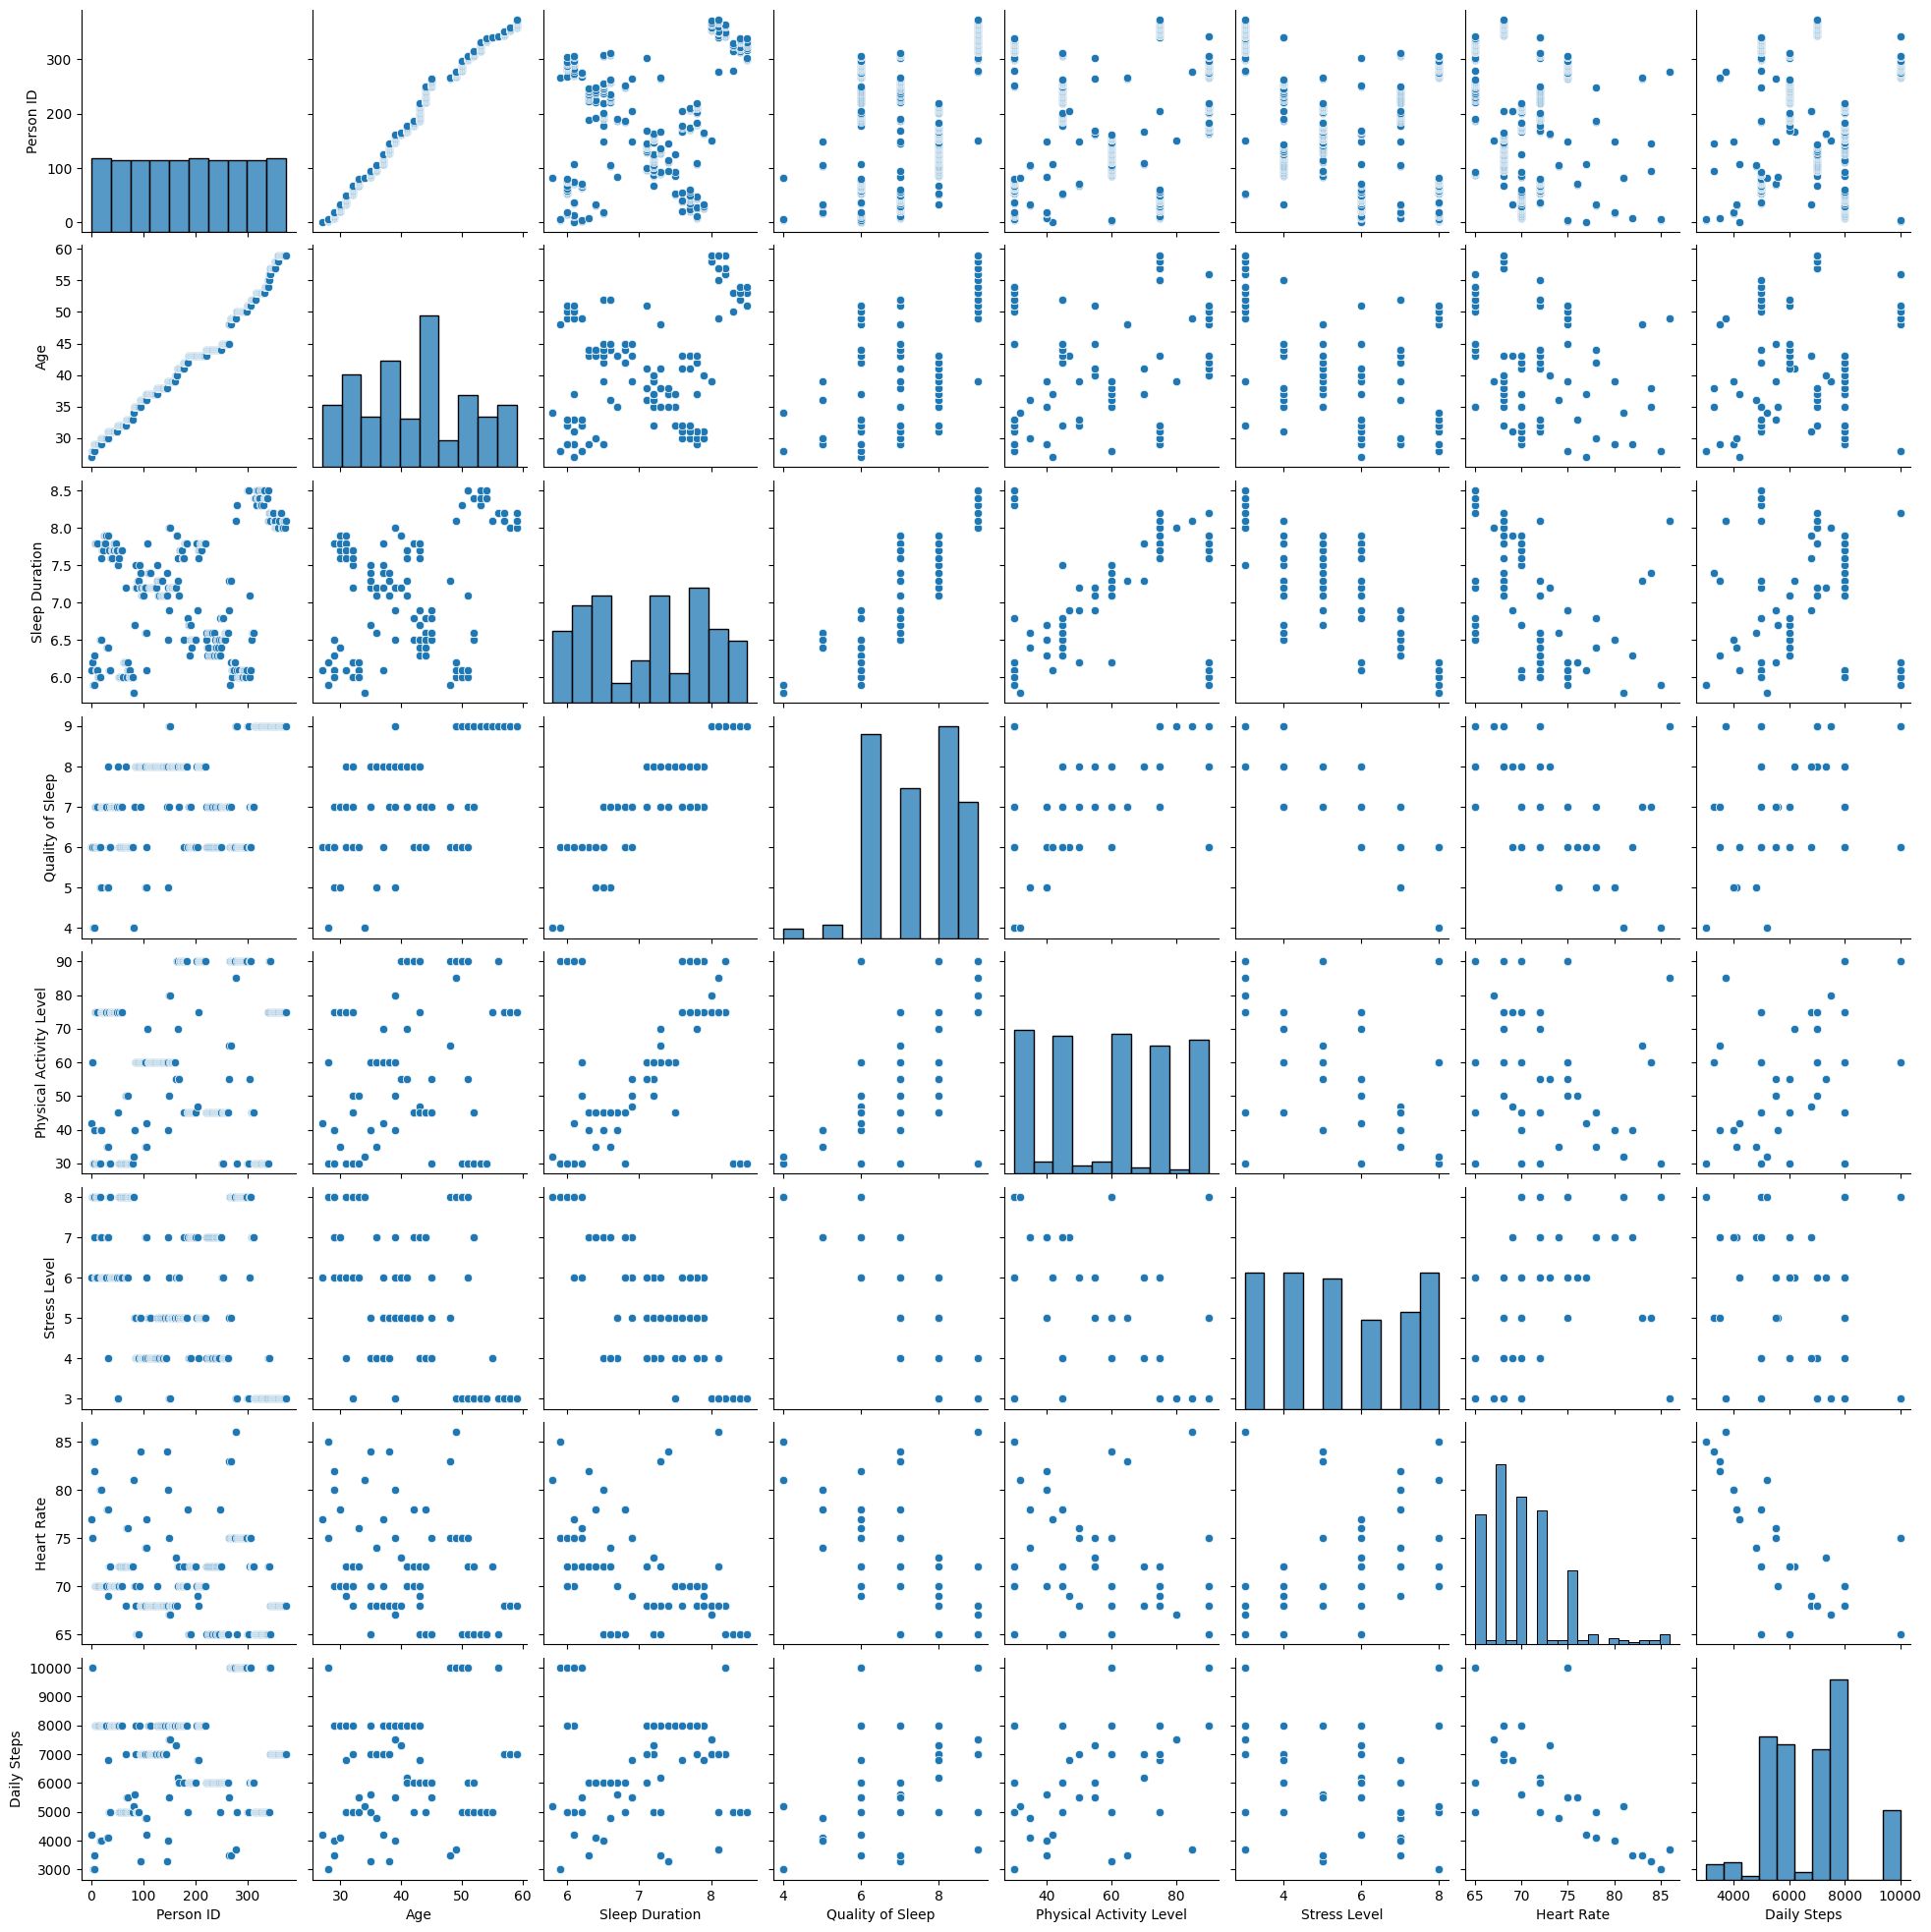

In [12]:
#scatter plot to check if there is any obvious pattern

sns.pairplot(df,kind='scatter')
plt.show()

In [13]:
df.columns.to_list()


['Person ID',
 'Gender',
 'Age',
 'Occupation',
 'Sleep Duration',
 'Quality of Sleep',
 'Physical Activity Level',
 'Stress Level',
 'BMI Category',
 'Blood Pressure',
 'Heart Rate',
 'Daily Steps',
 'Sleep Disorder']

In [14]:
#check data distribution

import plotly.express as px

columns = df.columns.to_list()

for column in columns:
    fig = px.histogram(data_frame=df, x=column)
    fig.show()

# To define a definition of a "Healthy Person"



1.   BMI_point

A new column of the health score checked from BMI Category will be created and assign values from the following criteria:

      - A person with "Normal" and "Normal Weight" value is considered healthy and is assigned **0** point
      - A person with "Overweight" value is considered not very healthy and is assigned **-1** point
      - A person with "Obese" value is considered not healthy and is assigned **-2** point

2.   BP_point

The blood pressure category is according to the information from the American Health Association. [link](https://www.houstonmethodist.org/blog/articles/2019/dec/blood-pressure-what-your-numbers-mean-for-your-health/)

A new column of the health score checked from Blood Pressure Category will be created and assign values from the following criteria:

      - A person with "Normal" value is considered healthy and is assigned **0** point
      - A person with "Elevated" value is considered not very healthy and is assigned **-1** point
      - A person with other values is considered not healthy and is assigned **-2** point

3.   Overall_point

A new column of the health score checked from combining BMI_point and BP_point will be created and assign values from the following criteria:

      - A person with a point of better than -2 is considered healthy and is assigned **0** point
      - A person with other value is considered not healthy and is assigned **-1** point



In [15]:
#split the Blood Pressure Value into Top and Bottom integer value
df[['Top BP', 'Bottom BP']] = df['Blood Pressure'].str.split('/', expand=True)
df[['Top BP', 'Bottom BP']]= df[['Top BP', 'Bottom BP']].astype('int64')

In [16]:
df.head()

Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8        Obese   
4                 4                       30             8        Obese   

  Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  Top BP  Bottom BP  
0         126/83          77         4200              0     126         83  
1         125/80          75        10000              0     125         80  
2         125/80          75        10000              0     125         80  
3         140/90          85         3000    Sleep Apnea     140         90  
4         140/90          85         3000    Sleep Apnea     140         90

In [17]:
#create a helper function to assign the points

def check_BMI(value):
  if value == 'Normal' or value =='Normal Weight':
    return 0
  elif value == 'Overweight' or value =='Underweight':
    return -1
  else:
    return -3

def check_BP(top, bottom):
  if top <= 120 and bottom <= 80:
    return 0
  elif top < 130 and bottom <= 80:
    return -1
  elif top < 140 and bottom < 90:
    return -2
  else:
    return -3

def combine_health(h1,h2):
  if h1+h2 >= -2:
    return 0
  else:
    return -1

In [18]:
#assign BMI health score
df['BMI_check'] = df['BMI Category'].apply(check_BMI)

#assign BP health score
df['BP_check'] = df.apply(lambda x: check_BP(x['Top BP'],x['Bottom BP']), axis = 1)

#assign Overall health score
df['Overall_health'] = df.apply(lambda x: combine_health(x['BMI_check'],x['BP_check']), axis = 1)

In [19]:
df.head()

Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8        Obese   
4                 4                       30             8        Obese   

  Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  Top BP  Bottom BP  \
0         126/83          77         4200              0     126         83   
1         125/80          75        10000              0     125         80   
2         125/80          75        10000              0     125         80   
3         140/90          85         3000    Sleep Apnea     140         90   
4         140/90          85         3000    Sleep Apnea     140         90   

   BMI_check  BP_check  Overall_health  
0         -1        -2              -1  
1          0        -1               0  
2          0        -1               0  
3         -3        -3              -1  
4         -3        -3              -1

In [20]:
df.describe().T

count         mean          std     min     25%  \
Person ID                373.0   187.000000   107.820066     1.0    94.0   
Age                      373.0    42.139410     8.640793    27.0    35.0   
Sleep Duration           373.0     7.129491     0.795139     5.8     6.4   
Quality of Sleep         373.0     7.308311     1.195359     4.0     6.0   
Physical Activity Level  373.0    59.128686    20.842589    30.0    45.0   
Stress Level             373.0     5.391421     1.772590     3.0     4.0   
Heart Rate               373.0    70.171582     4.139704    65.0    68.0   
Daily Steps              373.0  6816.353887  1620.060932  3000.0  5600.0   
Top BP                   373.0   128.522788     7.735732   115.0   125.0   
Bottom BP                373.0    84.621984     6.146443    75.0    80.0   
BMI_check                373.0    -0.474531     0.641336    -3.0    -1.0   
BP_check                 373.0    -1.624665     1.108924    -3.0    -3.0   
Overall_health           373.0    -0.418231     0.493931    -1.0    -1.0   

                            50%     75%      max  
Person ID                 187.0   280.0    373.0  
Age                        43.0    50.0     59.0  
Sleep Duration              7.2     7.8      8.5  
Quality of Sleep            7.0     8.0      9.0  
Physical Activity Level    60.0    75.0     90.0  
Stress Level                5.0     7.0      8.0  
Heart Rate                 70.0    72.0     86.0  
Daily Steps              7000.0  8000.0  10000.0  
Top BP                    130.0   135.0    142.0  
Bottom BP                  85.0    90.0     95.0  
BMI_check                   0.0     0.0      0.0  
BP_check                   -2.0    -1.0      0.0  
Overall_health              0.0     0.0      0.0

# Insights from BMI Score

* People with Obese BMI Category tend to have heart rate higher than 80
* People with Obese BMI Category tend to have daily steps less than 4000
* Younger people with daily steps more than 7000 tend to have Normal BMI Category
* People with lower heart rate tend to have better BMI Score



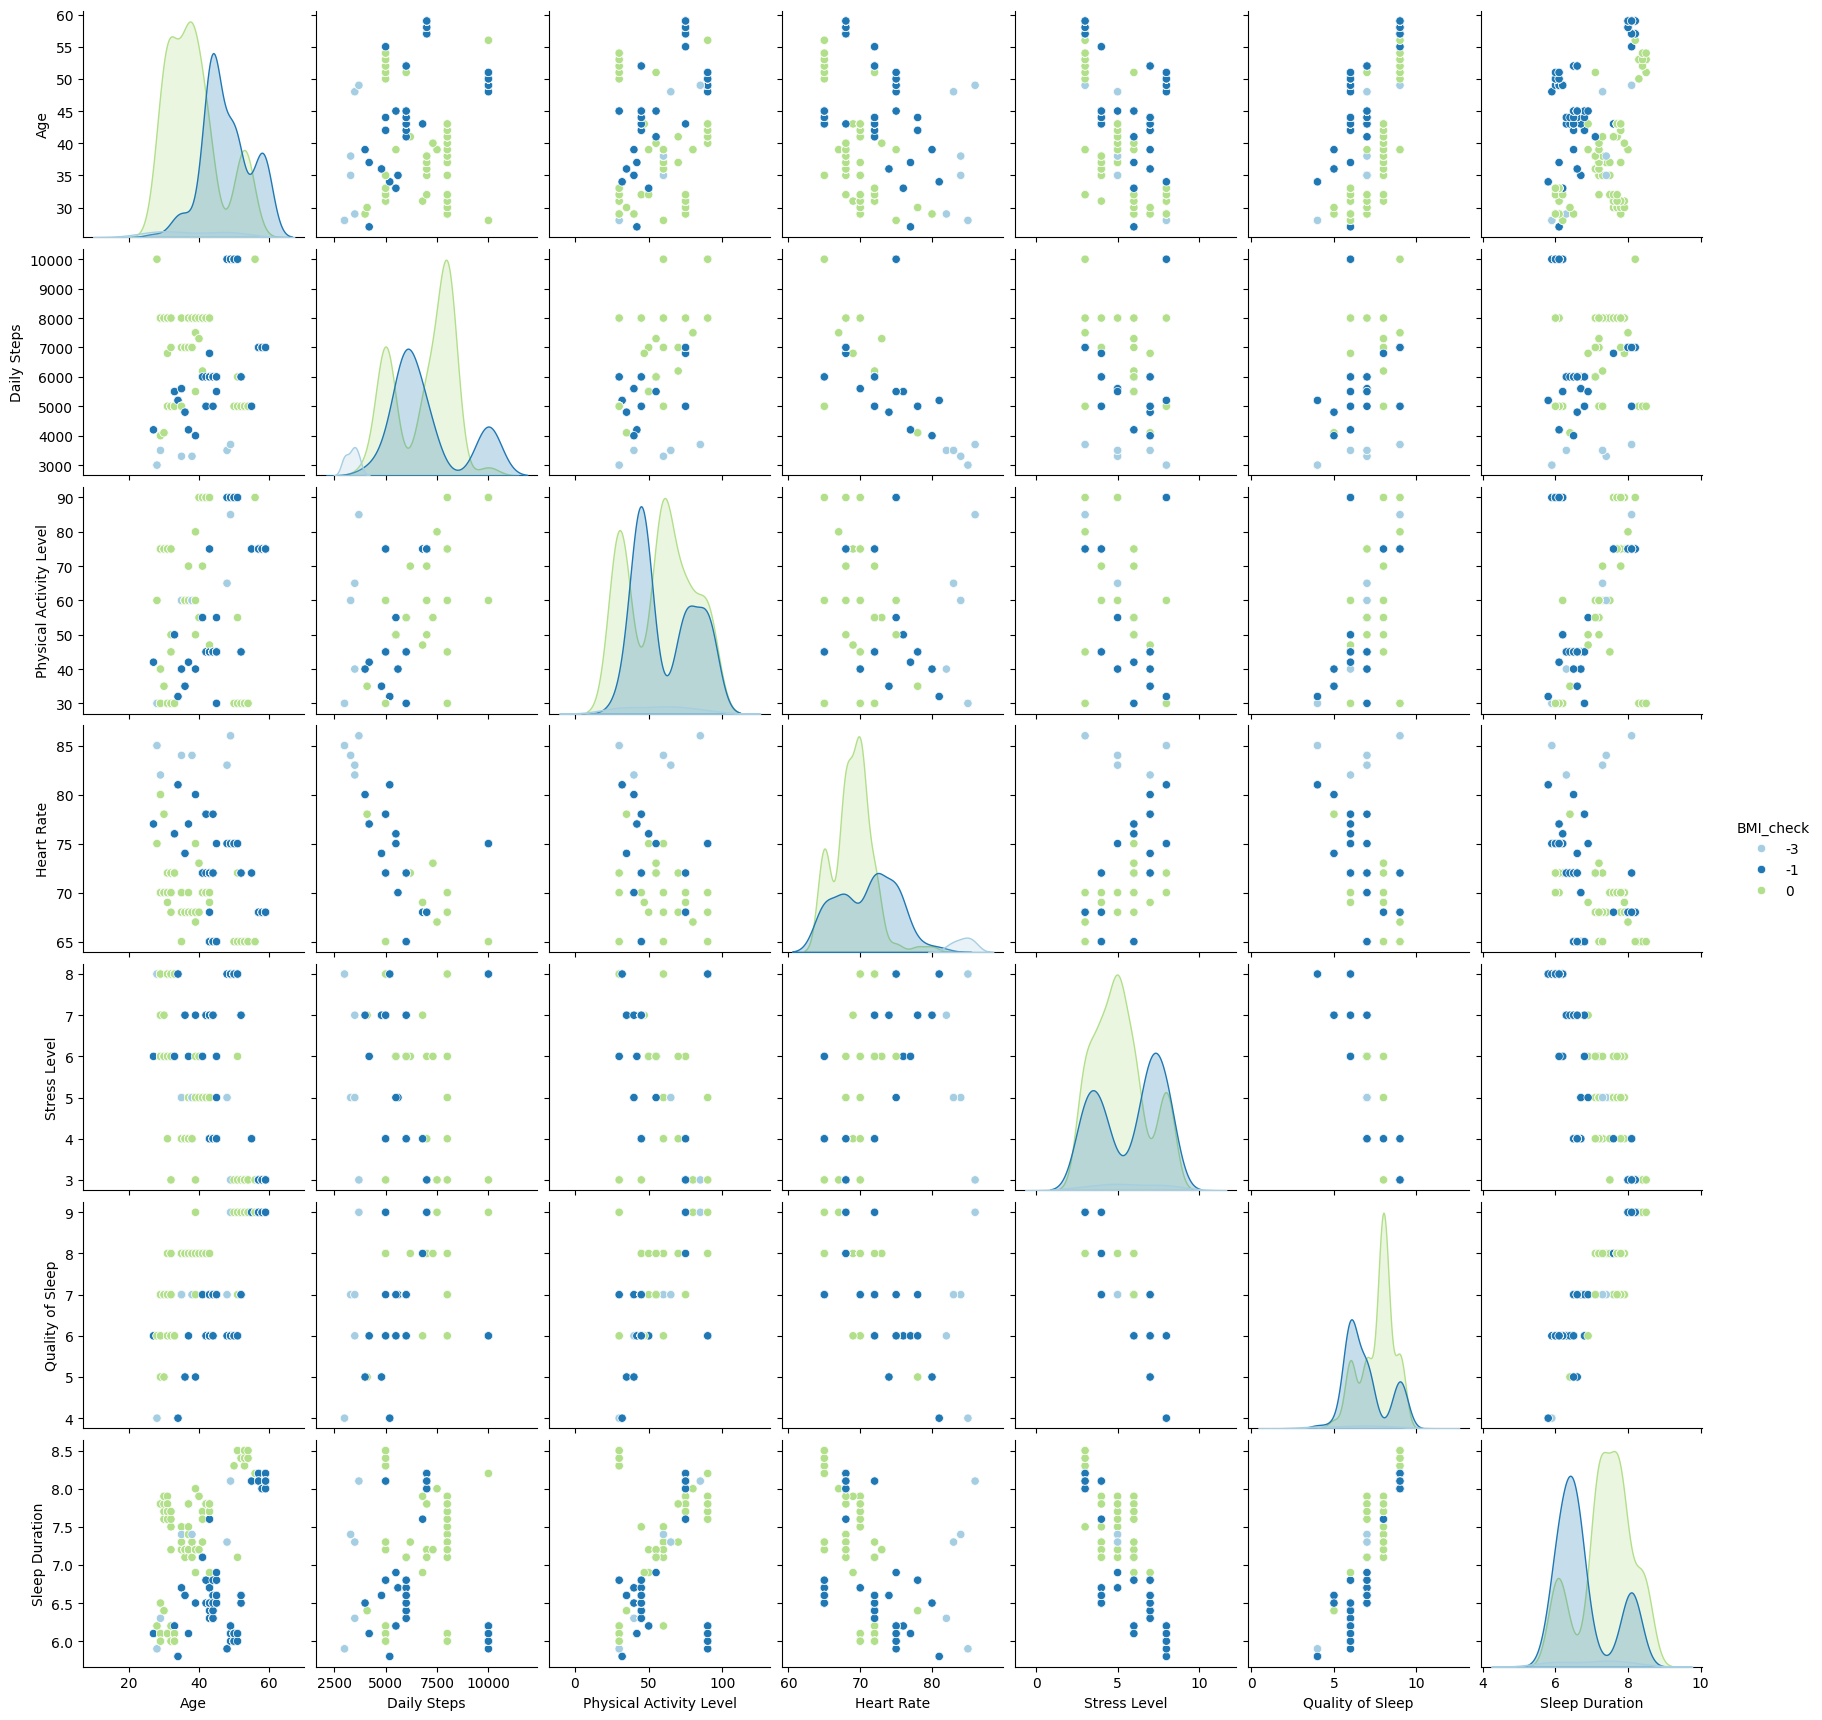

In [21]:
sns.pairplot(df, vars=['Age','Daily Steps', 'Physical Activity Level','Heart Rate' ,'Stress Level','Quality of Sleep', 'Sleep Duration'], hue = "BMI_check",palette = "Paired")

# Insights from BP Score

* People with lower heart rate tend to have better BP Score (They are two correlated features)
* People with lower heart rate and more daily steps tend to have better BP Score
* Younger people with more sleep duration tend to have Normal BP Category
* Younger people with daily steps more than 7000 tend to have better BP Category




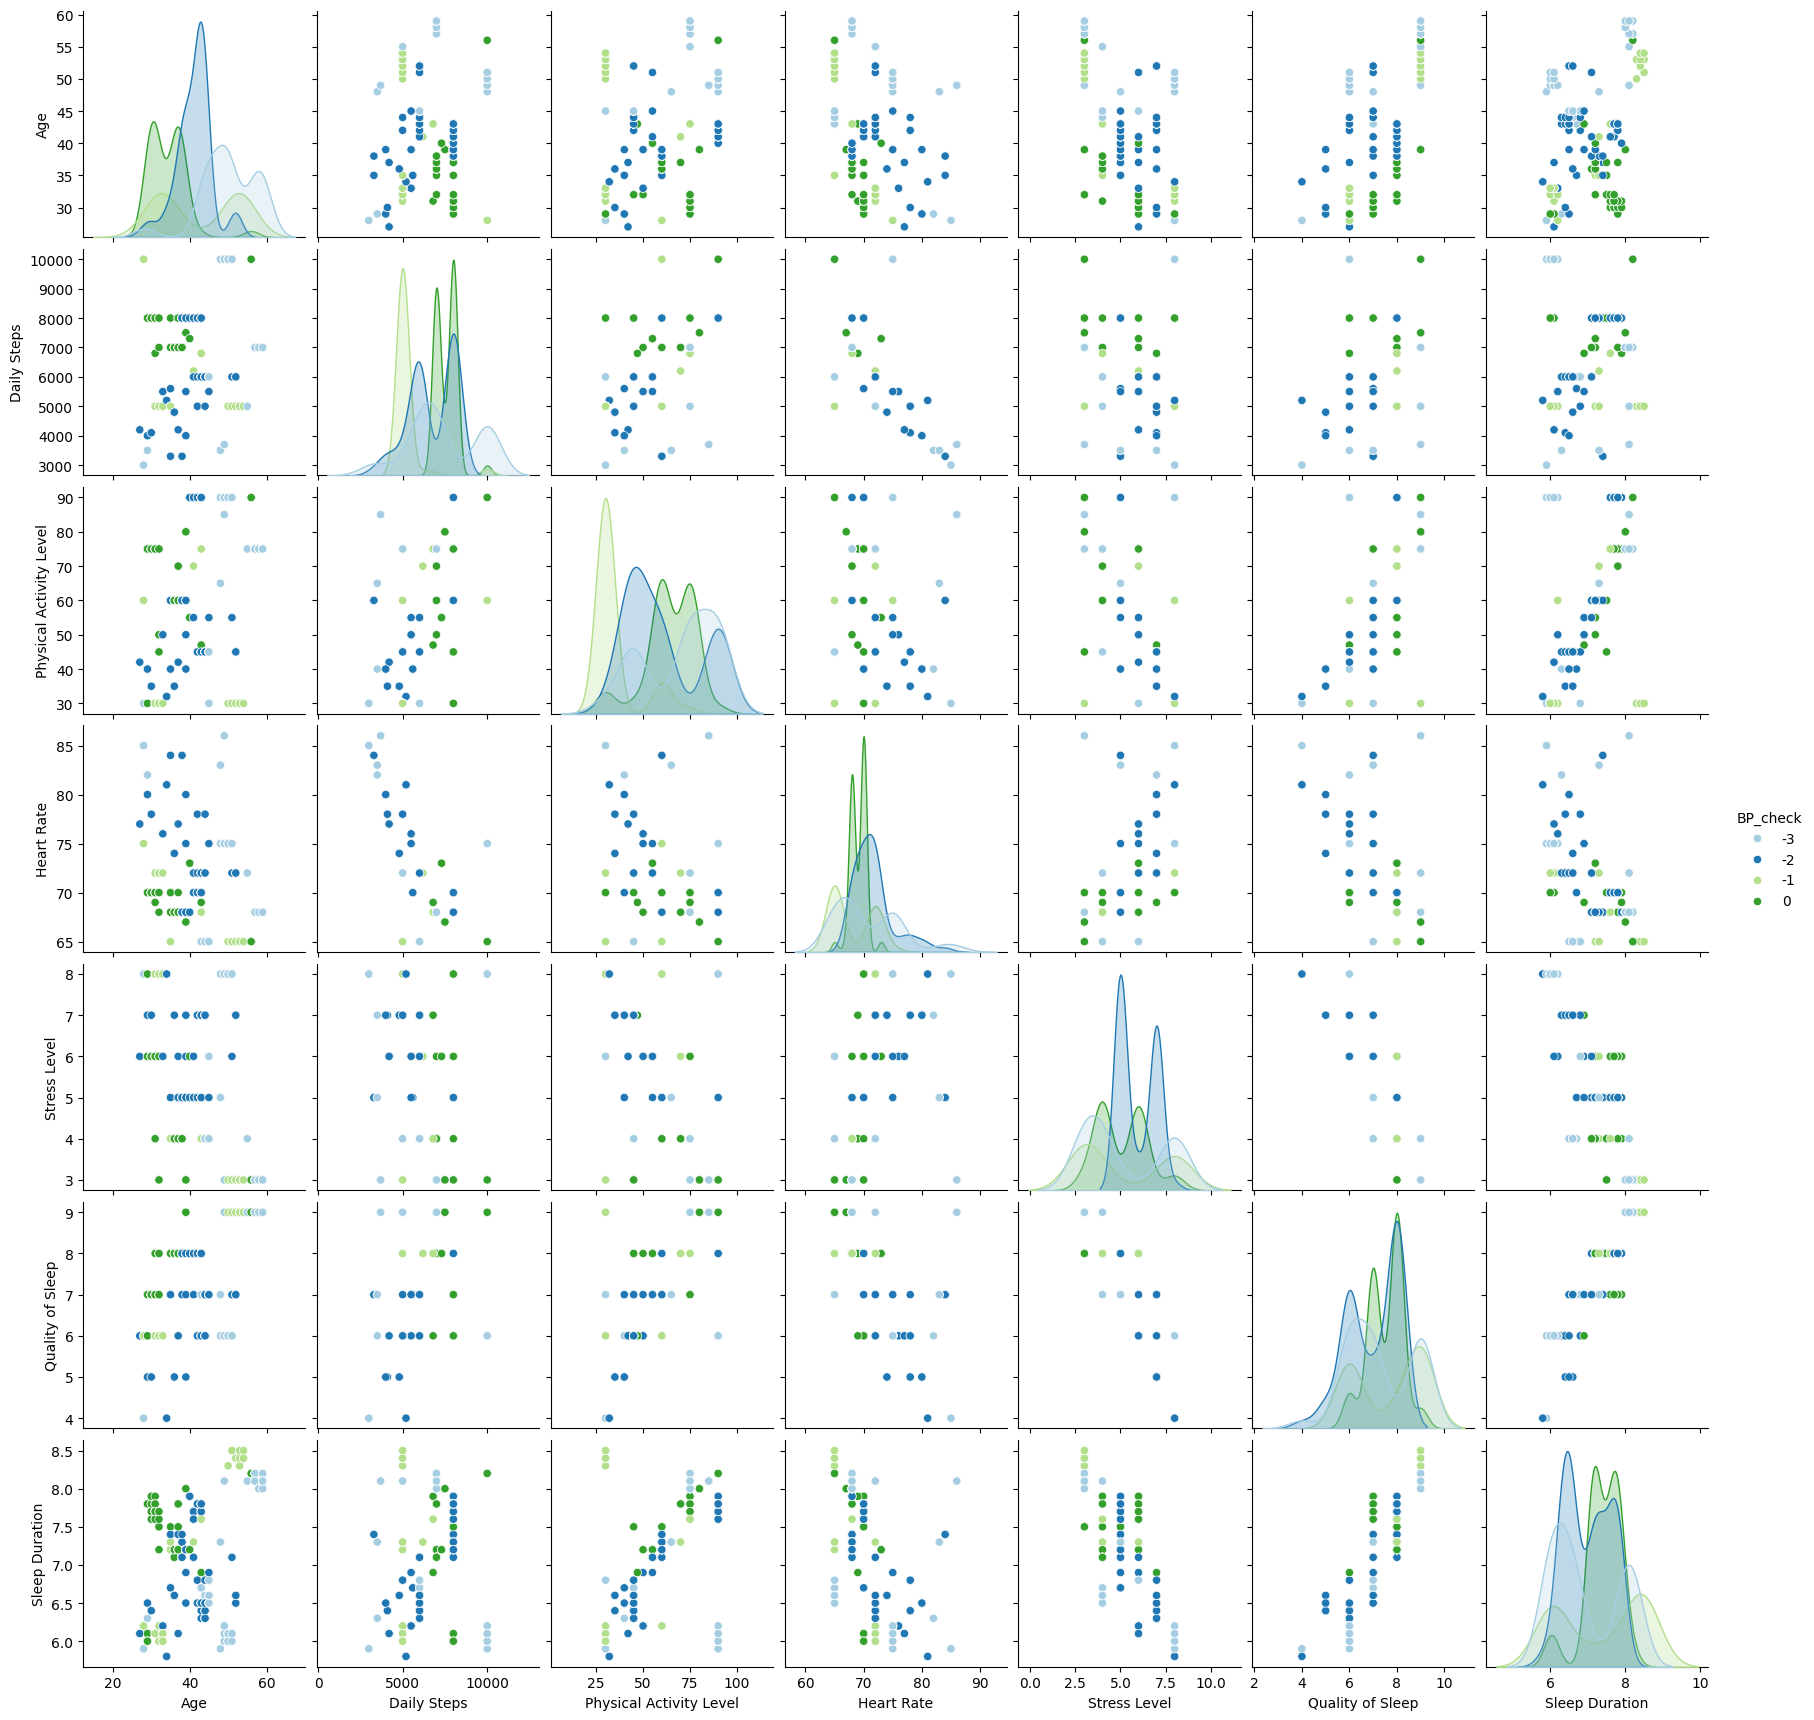

In [22]:
sns.pairplot(df, vars=['Age','Daily Steps', 'Physical Activity Level','Heart Rate' ,'Stress Level','Quality of Sleep', 'Sleep Duration'], hue = "BP_check",palette = "Paired")

# Insights from Overall Health Score

* Younger people tend to have better overall health score
* Younger people with more daily steps tend to have better overall health score
* Younger people with more physical activity level tend to have better overall health score
* Younger people with higher quality of sleep tend to have better overall health score
* People with quality of sleep of 8 with the sleep duration of 7-8 hours tend to have better overall health score
* People with higher sleep duration tend to have better overall health score
* People with lower heart rate tend to have better overall health score

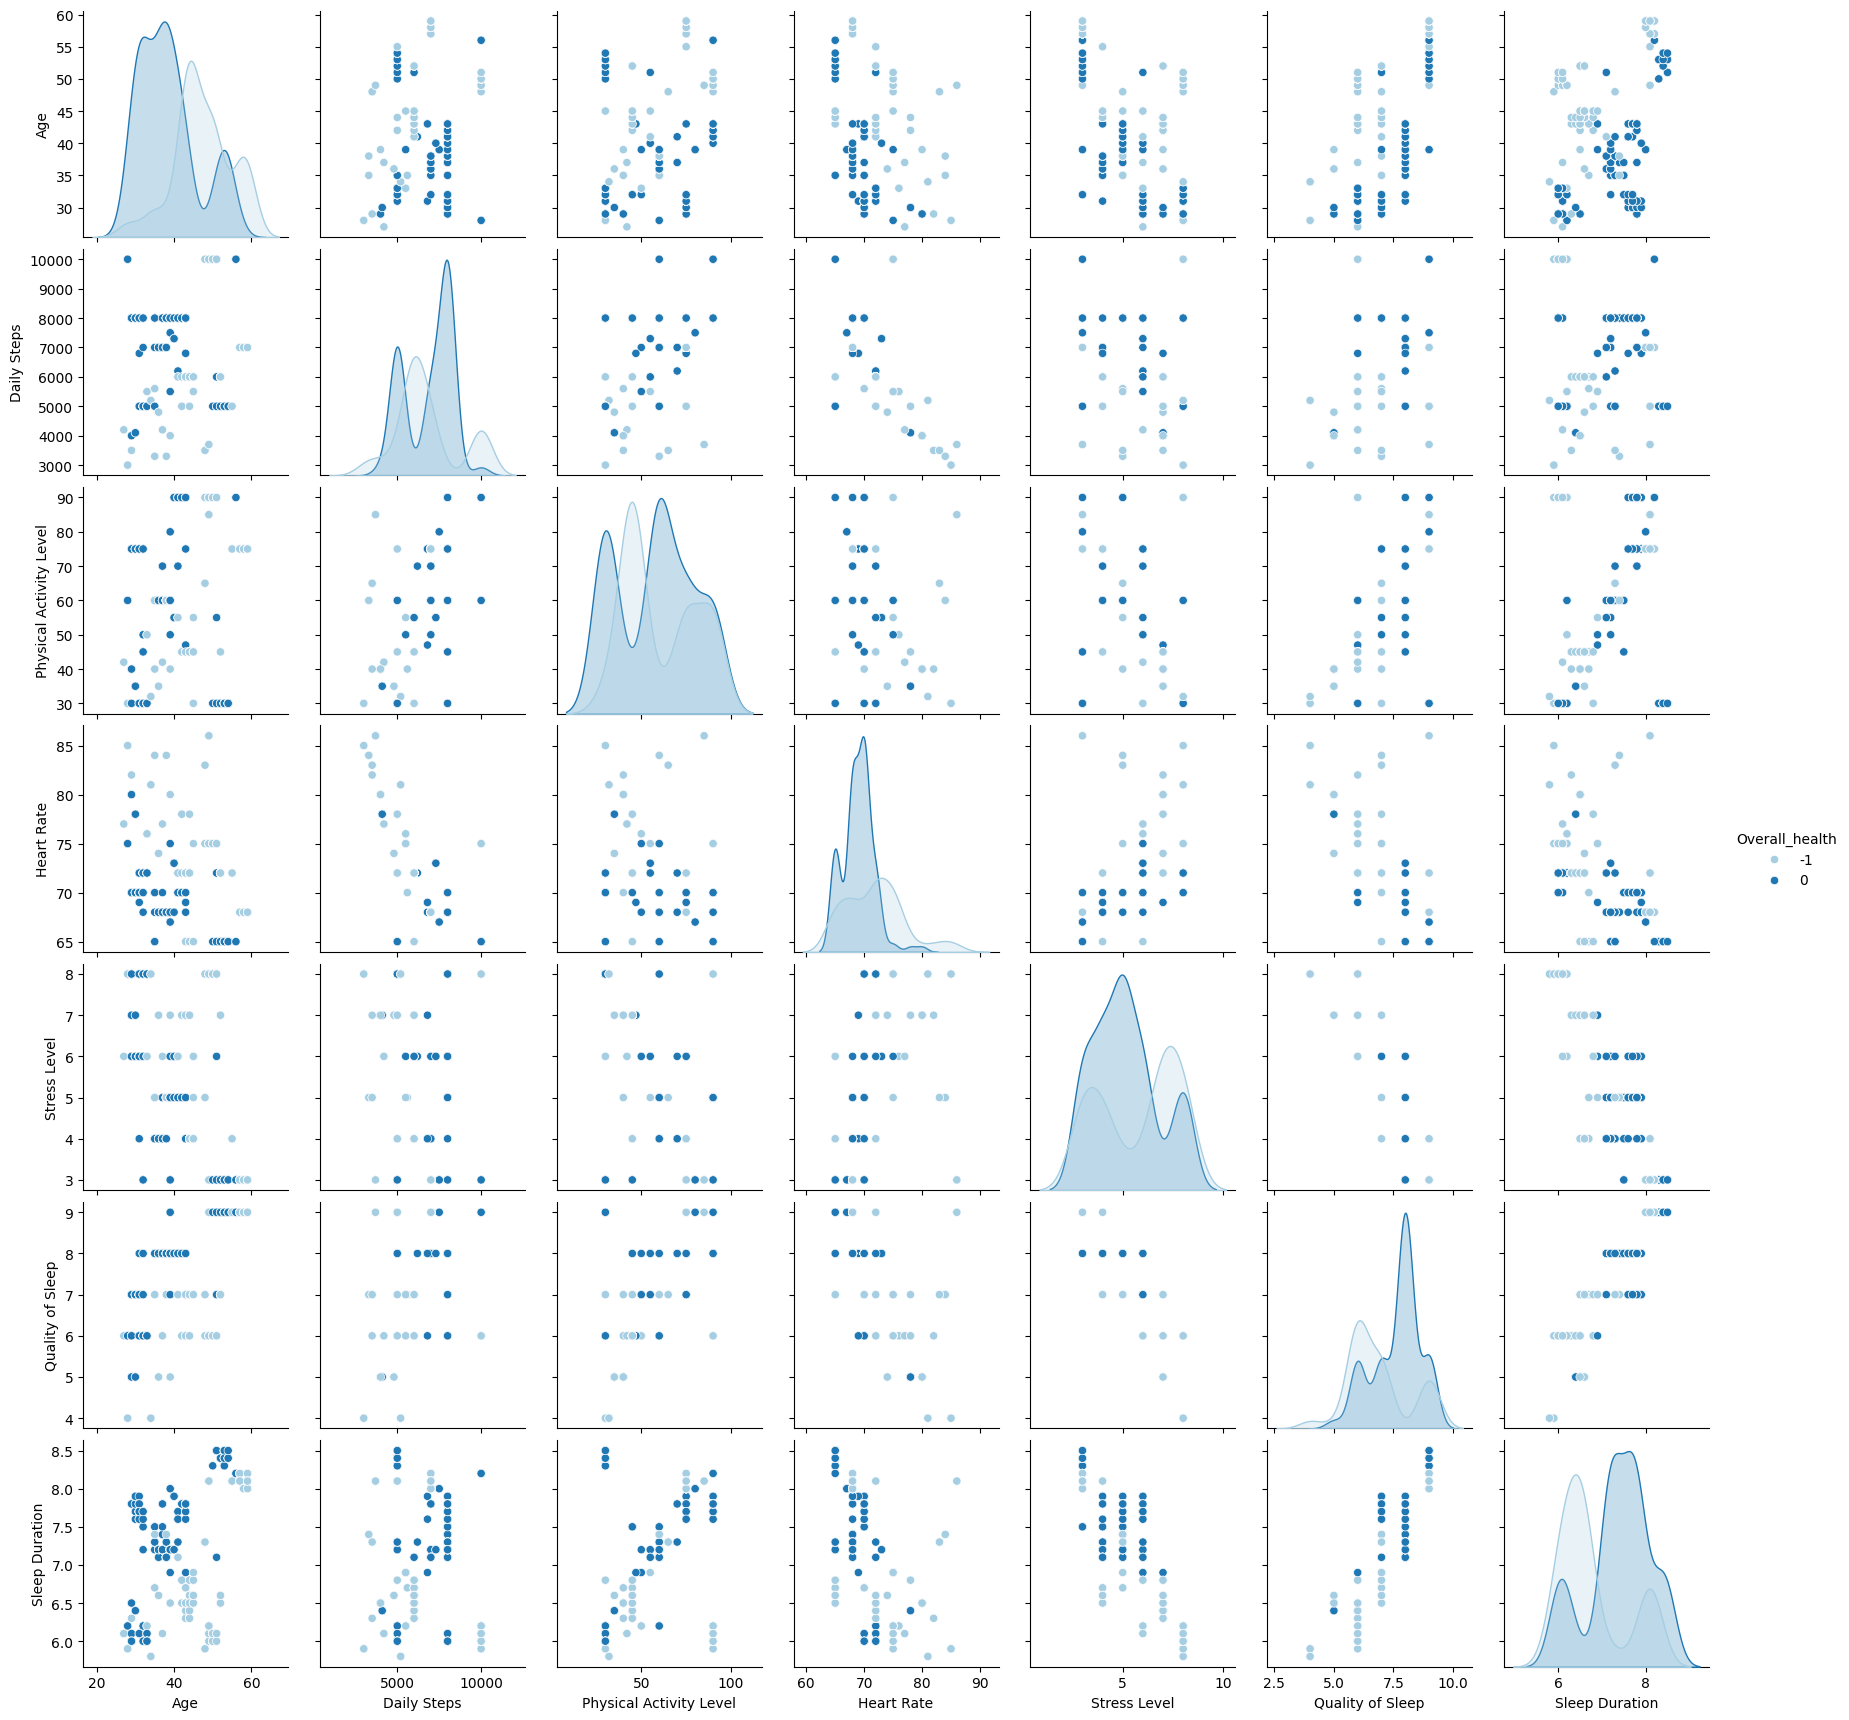

In [23]:
sns.pairplot(df, vars=['Age','Daily Steps', 'Physical Activity Level','Heart Rate' ,'Stress Level','Quality of Sleep', 'Sleep Duration'], hue = "Overall_health",palette = "Paired")

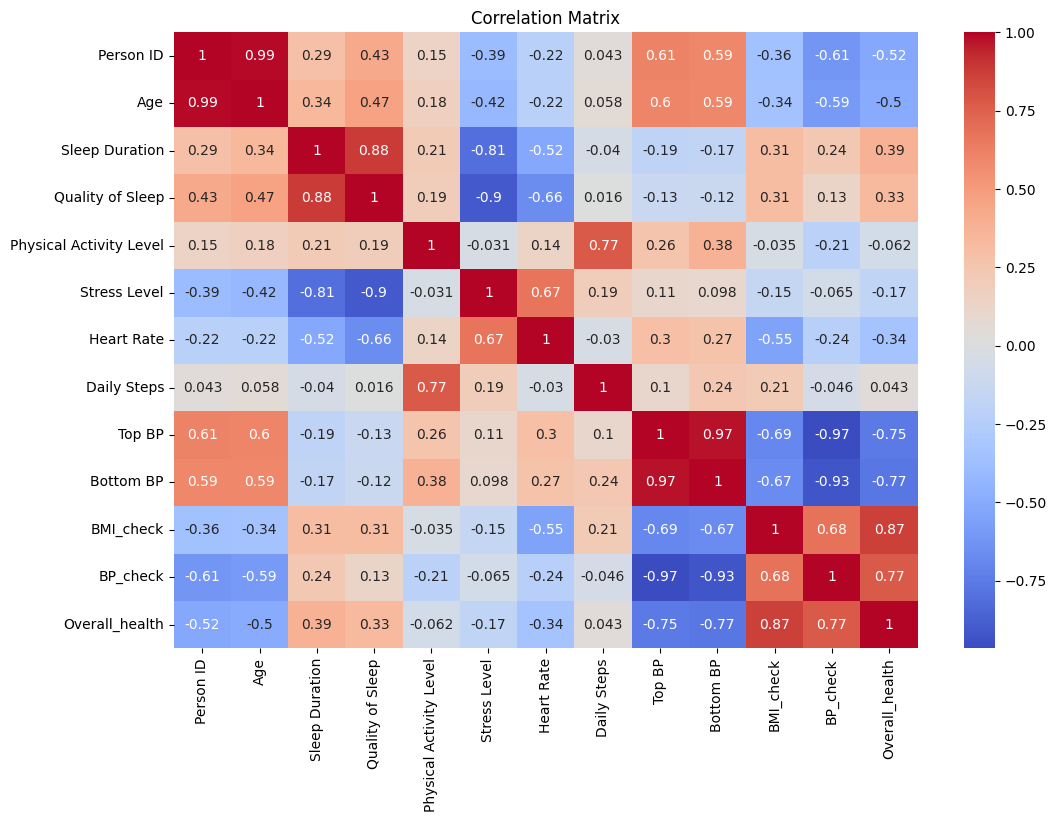

In [24]:
numeric_cols = df.select_dtypes(include=np.number).columns
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

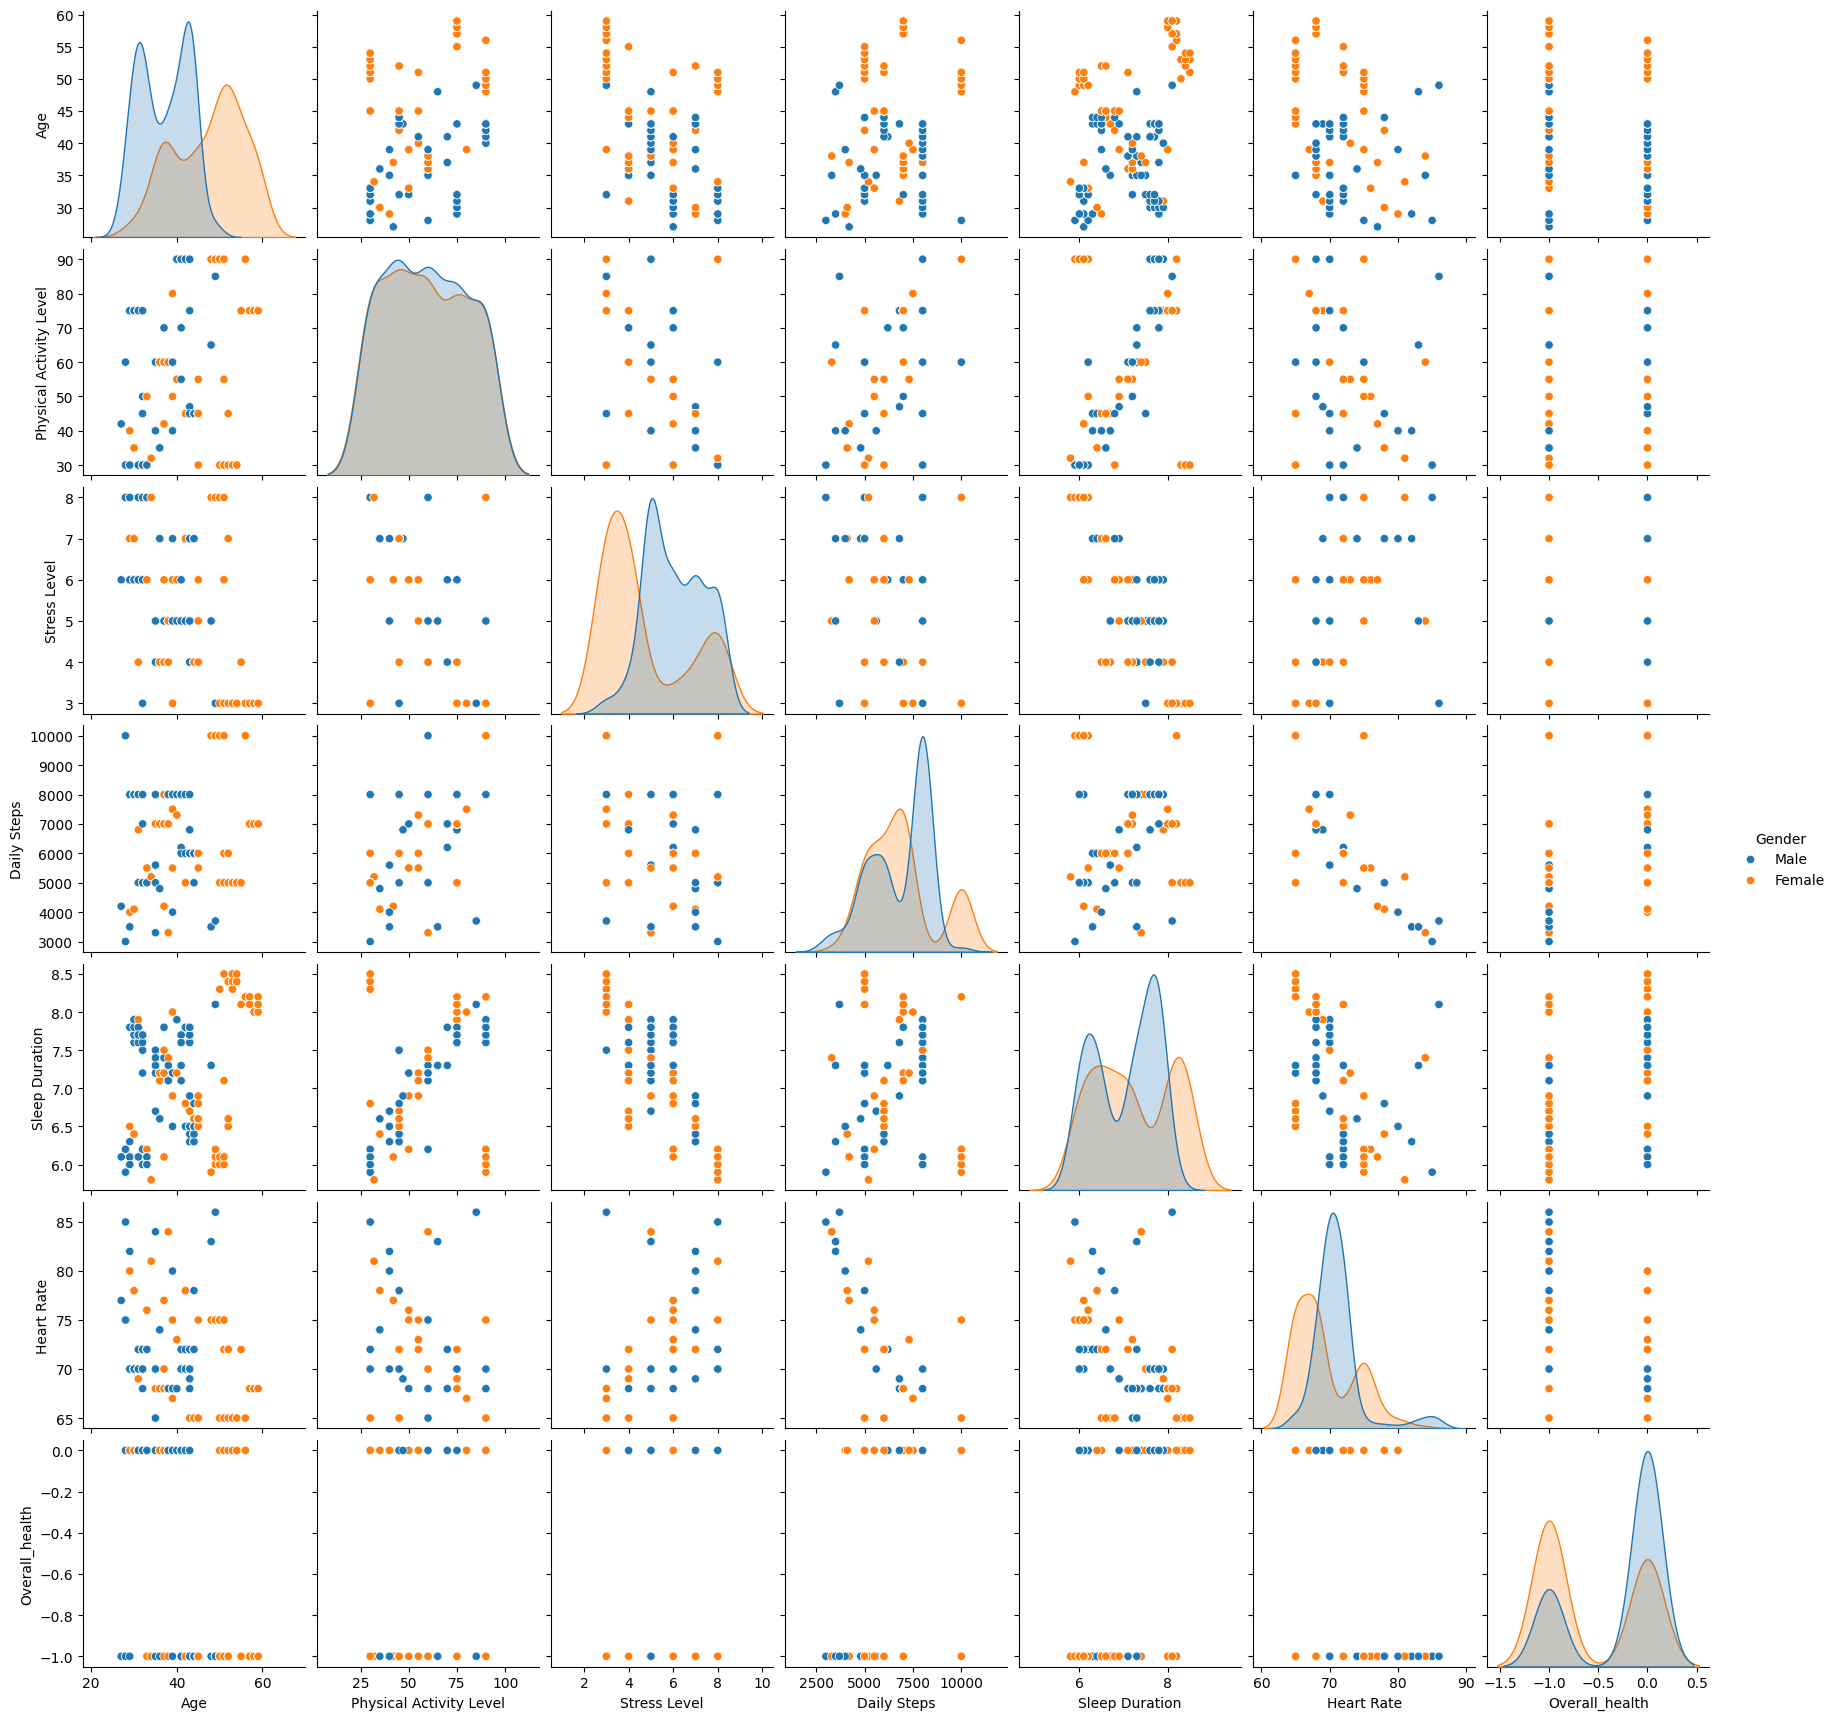

In [25]:
sns.pairplot(df, vars=['Age','Physical Activity Level' ,'Stress Level','Daily Steps', 'Sleep Duration','Heart Rate','Overall_health'], hue = "Gender")

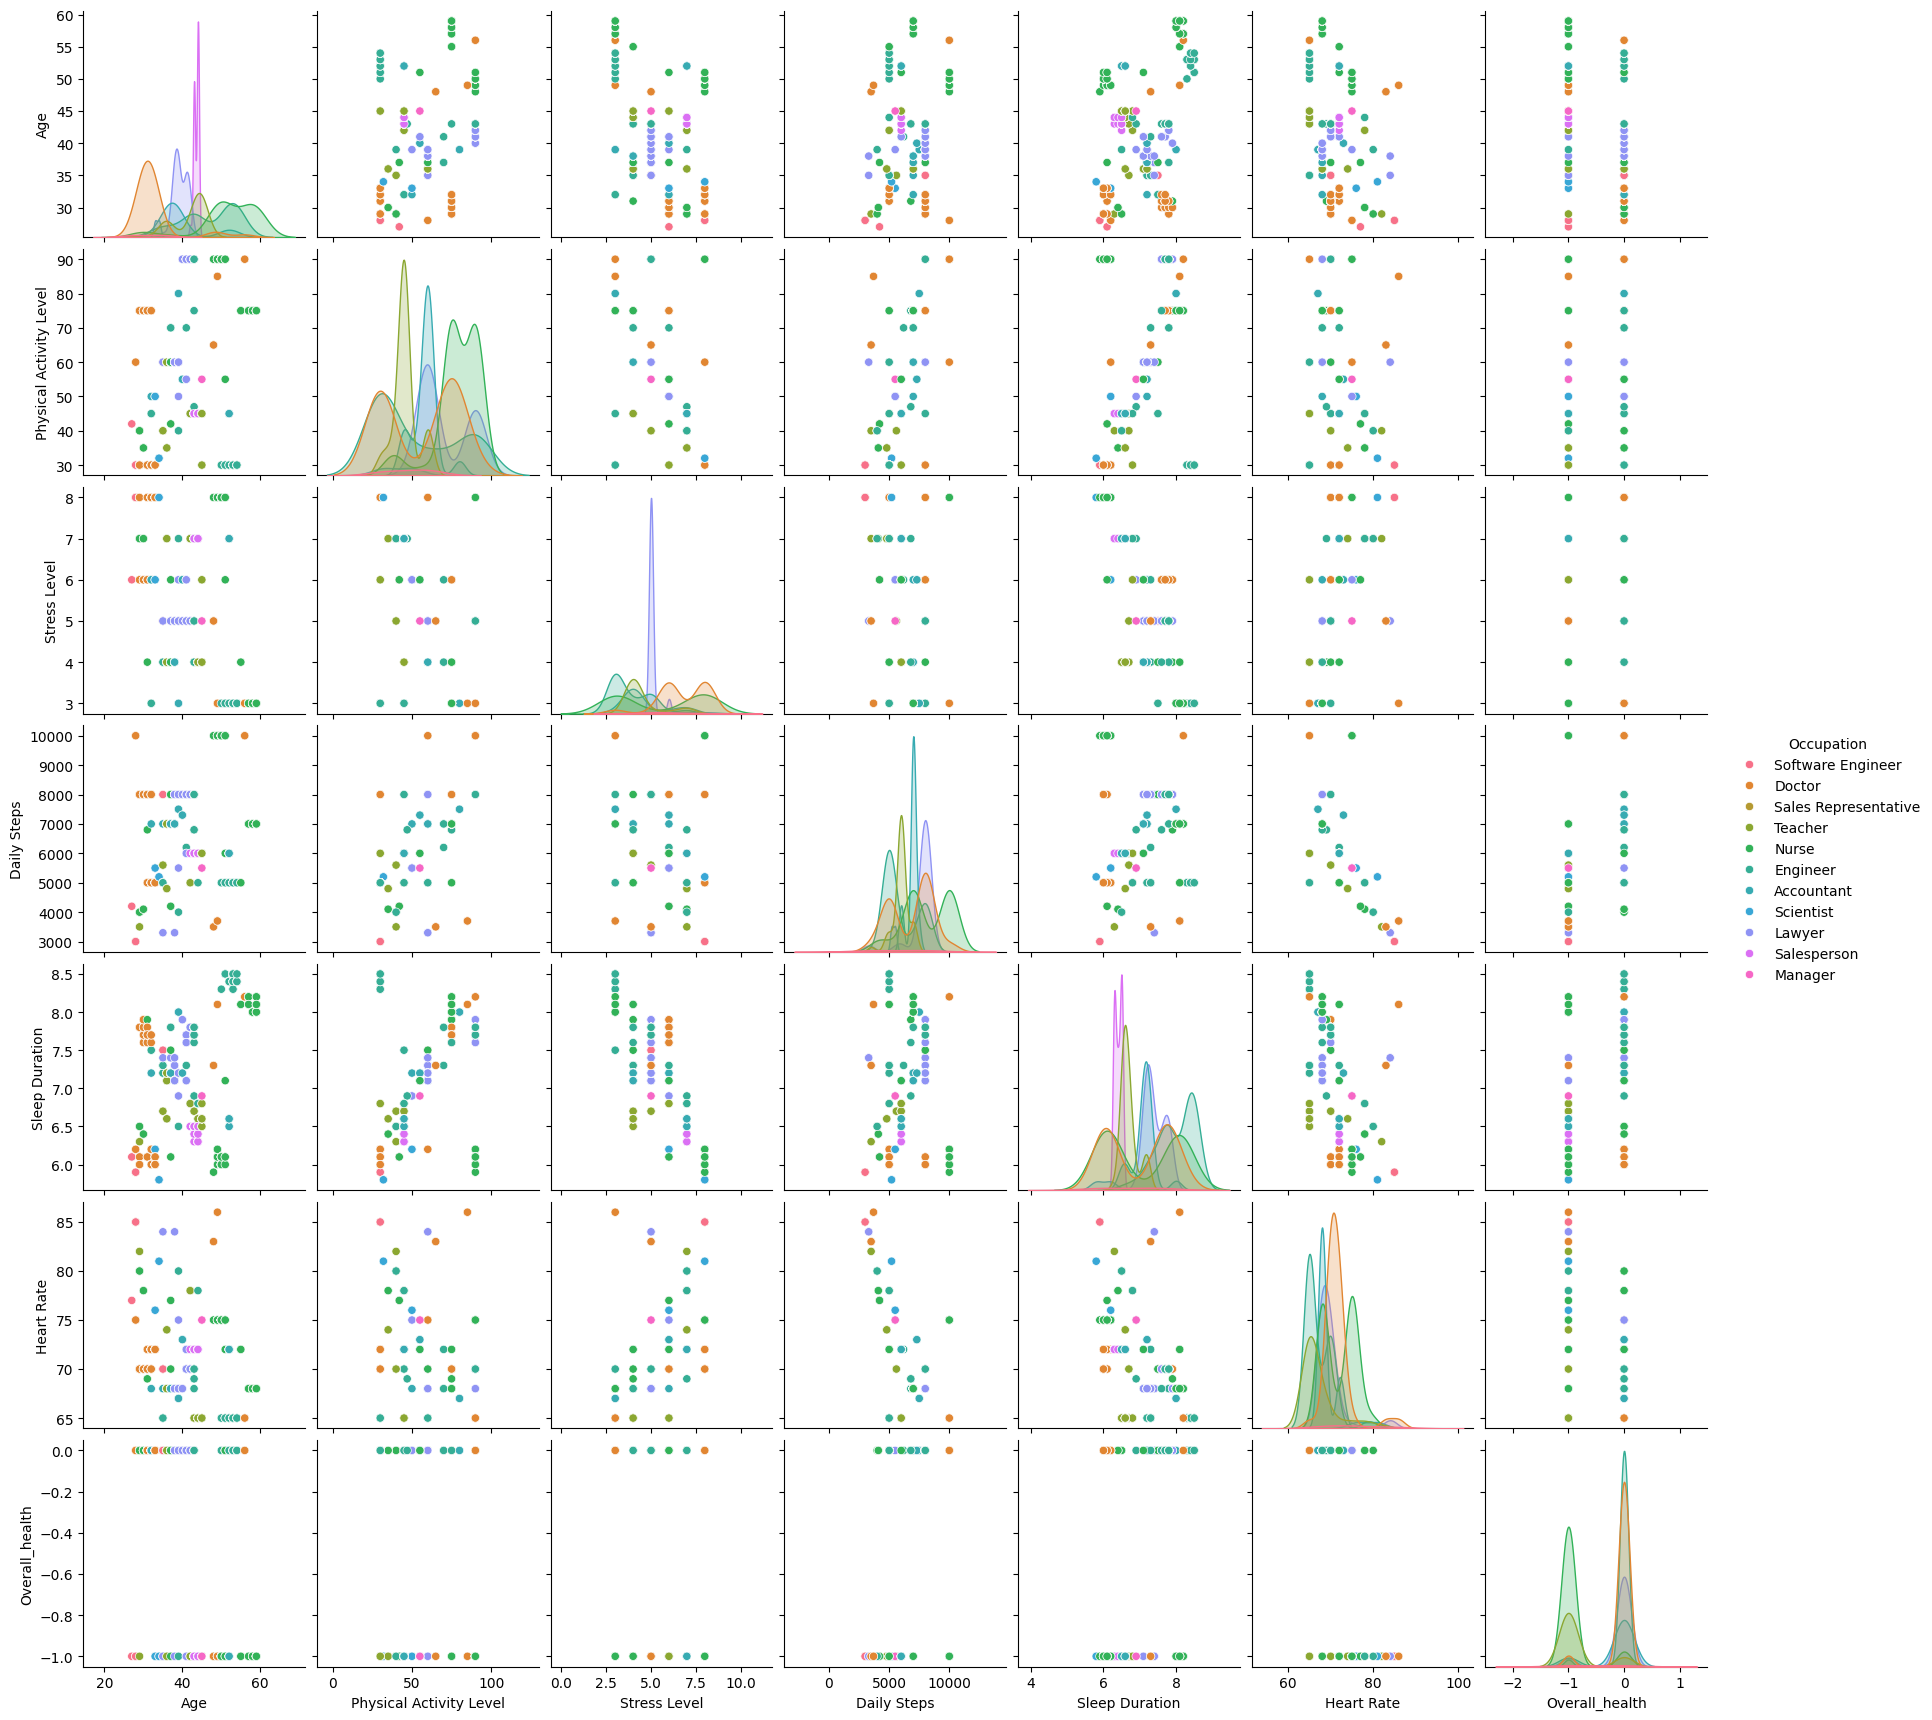

In [26]:
sns.pairplot(df, vars=['Age','Physical Activity Level' ,'Stress Level','Daily Steps', 'Sleep Duration','Heart Rate','Overall_health'], hue = "Occupation")